In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
data = load_breast_cancer()

In [26]:
x = data.data
y = data.target

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
knn= KNeighborsClassifier(n_neighbors=9)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
knn.score(x_test,y_test)

0.9385964912280702

In [31]:
from sklearn import metrics

In [32]:
yhat = knn.predict(x_test)
yhat[0:5]

array([0, 1, 0, 0, 1])

In [33]:
print("Train data accuracy: ",metrics.accuracy_score(y_train,knn.predict(x_train)))

Train data accuracy:  0.9406593406593406


In [34]:
print("Test data accuracy: ",metrics.accuracy_score(y_test,yhat))

Test data accuracy:  0.9385964912280702


In [38]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.90350877, 0.89473684, 0.92105263, 0.90350877, 0.92982456,
       0.92982456, 0.9122807 , 0.93859649, 0.93859649])

In [39]:
import matplotlib.pyplot as plt

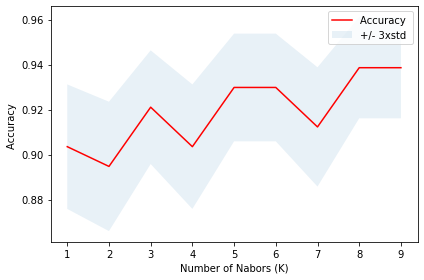

In [45]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()